In [1]:
import os
import re
import importlib

import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import block_reduce
from skimage.transform import resize

import data_utils
import CGAN

Using TensorFlow backend.


## Load and preprocess the data

In [48]:
importlib.reload(data_utils);

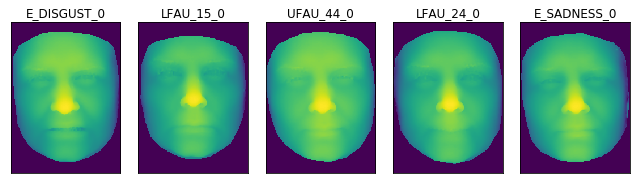

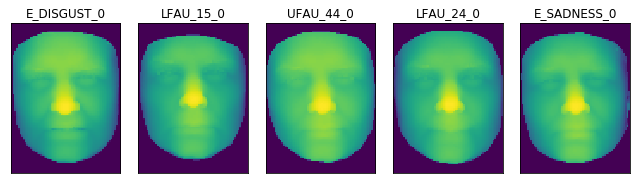

In [3]:
path = "/Users/jkamalu/Downloads/BosphorusDB"

# Load the data and store in dictionary
lookup_table = data_utils.load_data(path)

# Extract lists from dictionary and create inverse index
lookup_table, landmarks, face_data = data_utils.convert_data(lookup_table)

# Pad the face data to max width and height
data_utils.padding_data(face_data)

# Convert to numpy arrays
landmarks, face_data = map(np.array, (landmarks, face_data))

# Adjust and scale all channels
scaler, face_data = data_utils.scaling_data(face_data)

# Visualize the face data before resizing and downsampling
data_utils.visualize_z(face_data, lookup_table=lookup_table)

# Resize and downsample the images to 80 x 60 from 267 x 194
face_data = resize(face_data, (face_data.shape[0], 264, 192, face_data.shape[3]), preserve_range=True, mode="constant", anti_aliasing=True)
face_data = block_reduce(face_data, block_size=(1, 3, 3, 1), func=np.max)

# Visualize the face data after resizing and downsampling
data_utils.visualize_z(face_data, lookup_table=lookup_table)

## Train the model

In [49]:
importlib.reload(data_utils);
importlib.reload(CGAN);

In [50]:
class Params:

    drop_rate = 0.2
    n_filters = 32
    n_rand = 100
    batch_size = 32
    train_steps = 500
    interval = 1
    
    def __init__(self, X, X_cond=None):
        _, self.W, self.H, self.n_channels = X.shape
        _, self.n_cond = X_cond.shape if X_cond else (None, 0)

In [51]:
X = face_data[:, :, :, 0:1]
network = CGAN.CGAN(Params(X))

Step 1:



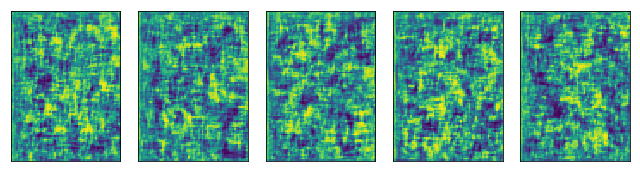


Descriminator :: loss = 0.6360881328582764, acc = 0.796875
Adversarial   :: loss = 3.34602689743042, acc = 0.0
Step 2:



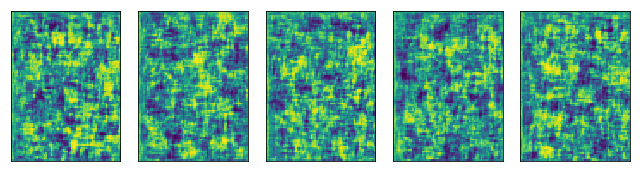


Descriminator :: loss = 0.4773983359336853, acc = 0.5
Adversarial   :: loss = 3.024986743927002, acc = 0.0
Step 3:



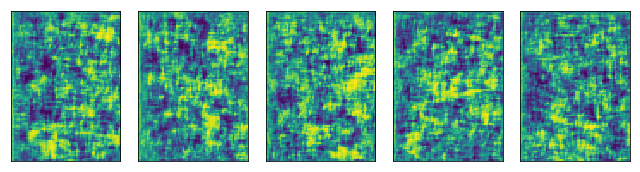


Descriminator :: loss = 0.40927940607070923, acc = 0.96875
Adversarial   :: loss = 4.041016578674316, acc = 0.0
Step 4:



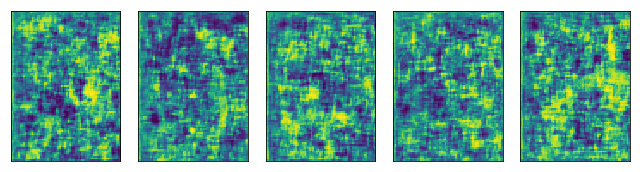


Descriminator :: loss = 0.33718714118003845, acc = 1.0
Adversarial   :: loss = 4.450675964355469, acc = 0.0
Step 5:



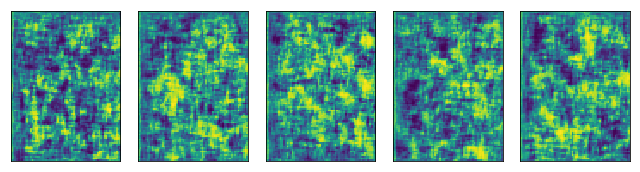


Descriminator :: loss = 0.2723580300807953, acc = 1.0
Adversarial   :: loss = 4.483984470367432, acc = 0.0
Step 6:



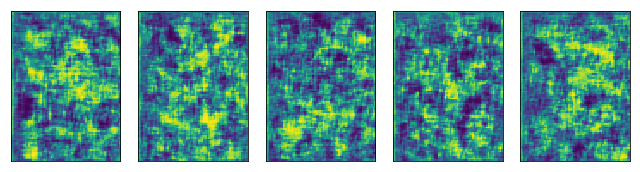


Descriminator :: loss = 0.19760724902153015, acc = 1.0
Adversarial   :: loss = 4.987826347351074, acc = 0.0
Step 7:



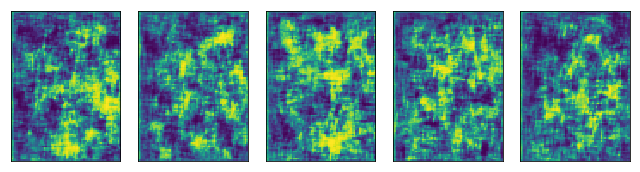


Descriminator :: loss = 0.15343737602233887, acc = 1.0
Adversarial   :: loss = 6.270972728729248, acc = 0.0
Step 8:



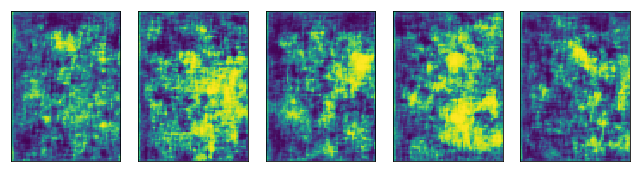


Descriminator :: loss = 0.11001188308000565, acc = 1.0
Adversarial   :: loss = 5.023242950439453, acc = 0.0
Step 9:



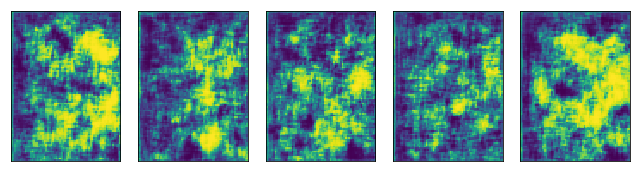


Descriminator :: loss = 0.07609620690345764, acc = 1.0
Adversarial   :: loss = 5.9357404708862305, acc = 0.0
Step 10:



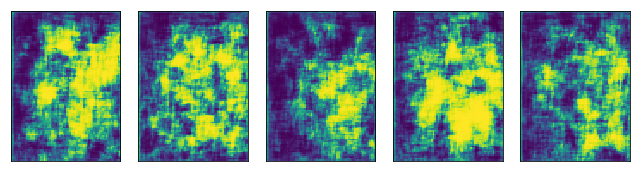


Descriminator :: loss = 0.06283760815858841, acc = 1.0
Adversarial   :: loss = 7.04075288772583, acc = 0.0
Step 11:



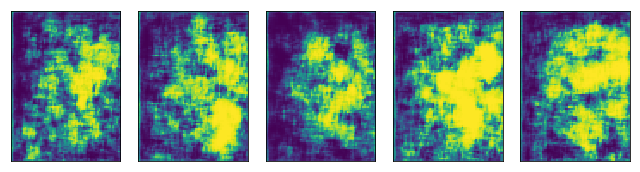


Descriminator :: loss = 0.047337643802165985, acc = 1.0
Adversarial   :: loss = 6.5889058113098145, acc = 0.0
Step 12:



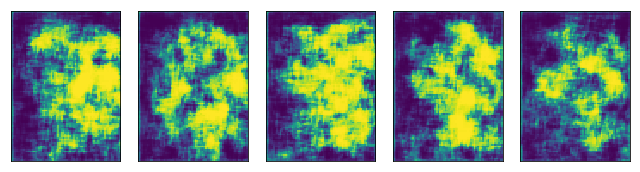


Descriminator :: loss = 0.03816908597946167, acc = 1.0
Adversarial   :: loss = 7.400412559509277, acc = 0.0
Step 13:



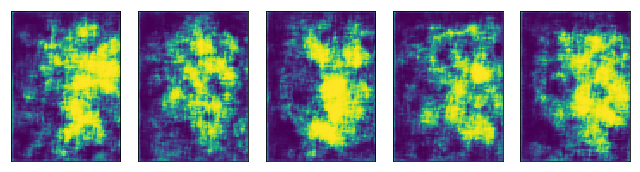


Descriminator :: loss = 0.02872490882873535, acc = 1.0
Adversarial   :: loss = 6.224915504455566, acc = 0.0
Step 14:



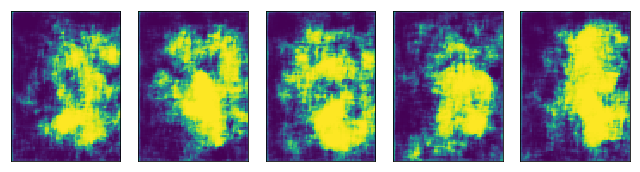


Descriminator :: loss = 0.022612452507019043, acc = 1.0
Adversarial   :: loss = 7.614422798156738, acc = 0.0
Step 15:



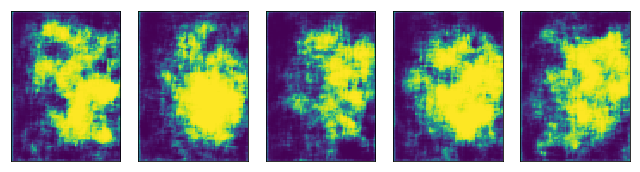


Descriminator :: loss = 0.02823825366795063, acc = 0.984375
Adversarial   :: loss = 9.519102096557617, acc = 0.0
Step 16:



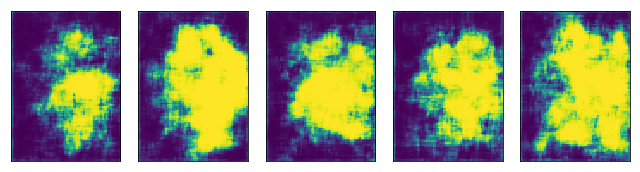


Descriminator :: loss = 0.022991392761468887, acc = 1.0
Adversarial   :: loss = 7.7575201988220215, acc = 0.03125
Step 17:



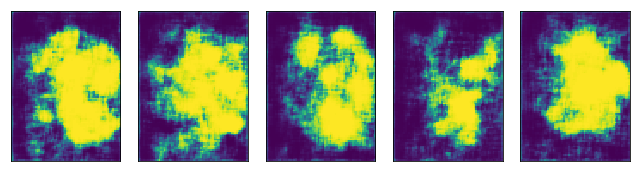


Descriminator :: loss = 0.012168633751571178, acc = 1.0
Adversarial   :: loss = 6.6634697914123535, acc = 0.03125
Step 18:



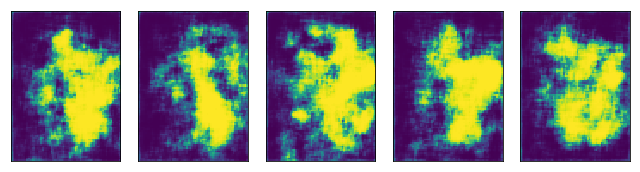


Descriminator :: loss = 0.008265654556453228, acc = 1.0
Adversarial   :: loss = 5.848462104797363, acc = 0.0625
Step 19:



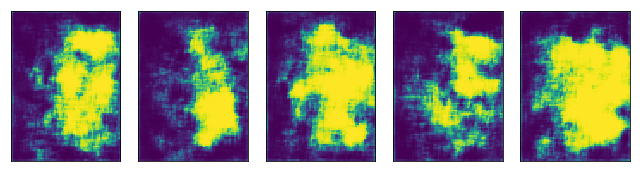


Descriminator :: loss = 0.027659233659505844, acc = 0.984375
Adversarial   :: loss = 11.81231689453125, acc = 0.0
Step 20:



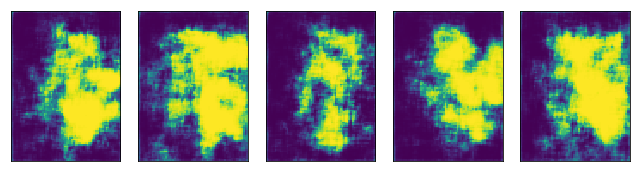


Descriminator :: loss = 0.014437161386013031, acc = 1.0
Adversarial   :: loss = 9.699501991271973, acc = 0.03125
Step 21:



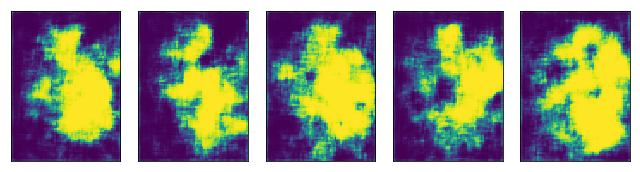


Descriminator :: loss = 0.009423084557056427, acc = 1.0
Adversarial   :: loss = 8.271236419677734, acc = 0.0
Step 22:



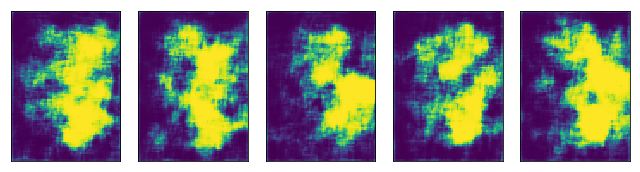


Descriminator :: loss = 0.0064300838857889175, acc = 1.0
Adversarial   :: loss = 7.26837682723999, acc = 0.09375
Step 23:



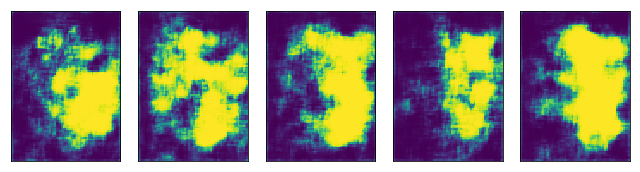


Descriminator :: loss = 0.005893360357731581, acc = 1.0
Adversarial   :: loss = 7.410881996154785, acc = 0.03125
Step 24:



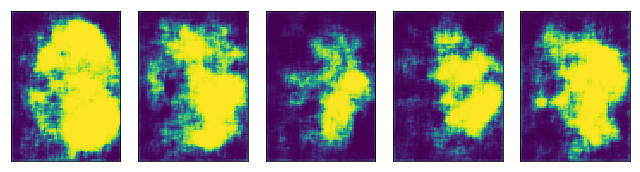


Descriminator :: loss = 0.004682053811848164, acc = 1.0
Adversarial   :: loss = 7.165258407592773, acc = 0.0625
Step 25:



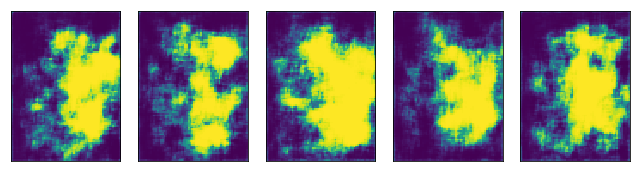


Descriminator :: loss = 0.003981938585639, acc = 1.0
Adversarial   :: loss = 6.426409721374512, acc = 0.03125
Step 26:



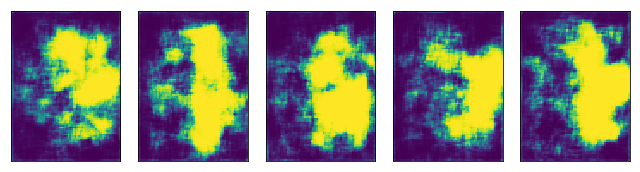


Descriminator :: loss = 0.0031592040322721004, acc = 1.0
Adversarial   :: loss = 5.718594551086426, acc = 0.0625
Step 27:



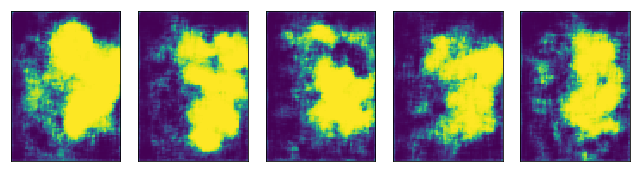


Descriminator :: loss = 0.003848360851407051, acc = 1.0
Adversarial   :: loss = 6.562938690185547, acc = 0.03125
Step 28:



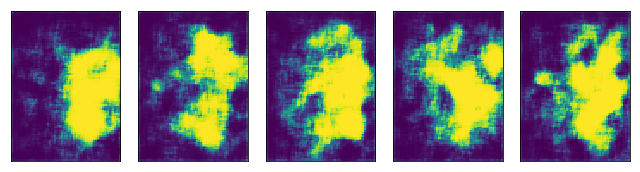


Descriminator :: loss = 0.0028868315275758505, acc = 1.0
Adversarial   :: loss = 6.417599678039551, acc = 0.125
Step 29:



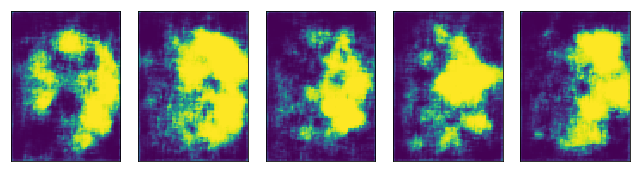


Descriminator :: loss = 0.002600111998617649, acc = 1.0
Adversarial   :: loss = 5.915261268615723, acc = 0.0625
Step 30:



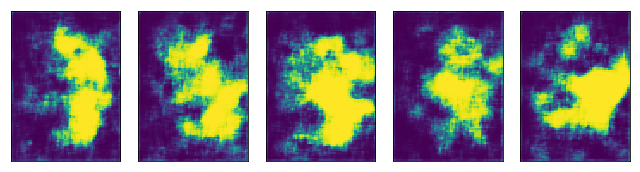


Descriminator :: loss = 0.007396197412163019, acc = 1.0
Adversarial   :: loss = 9.889261245727539, acc = 0.03125
Step 31:



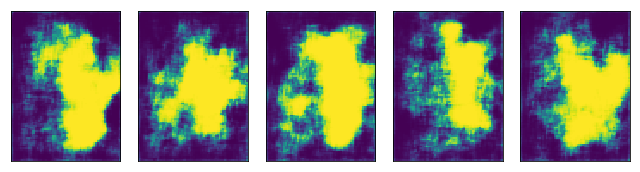


Descriminator :: loss = 0.004071604460477829, acc = 1.0
Adversarial   :: loss = 8.935708999633789, acc = 0.0
Step 32:



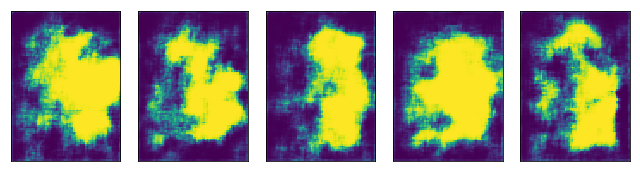


Descriminator :: loss = 0.00344907701946795, acc = 1.0
Adversarial   :: loss = 8.677010536193848, acc = 0.0
Step 33:



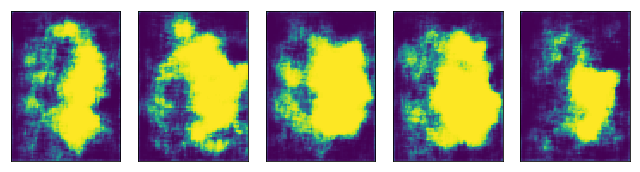


Descriminator :: loss = 0.0027052806690335274, acc = 1.0
Adversarial   :: loss = 8.214509963989258, acc = 0.03125
Step 34:



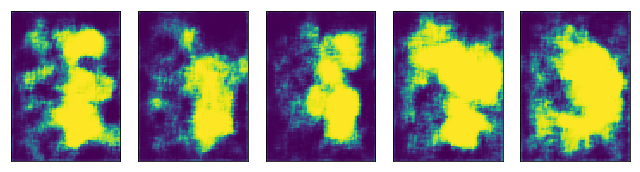


Descriminator :: loss = 0.00395462941378355, acc = 1.0
Adversarial   :: loss = 10.587928771972656, acc = 0.0
Step 35:



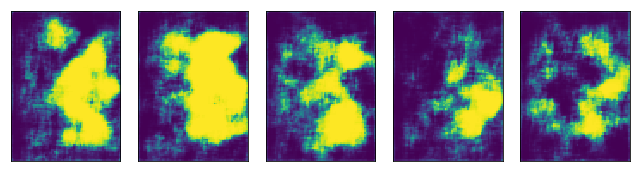


Descriminator :: loss = 0.002595483558252454, acc = 1.0
Adversarial   :: loss = 9.273909568786621, acc = 0.0
Step 36:



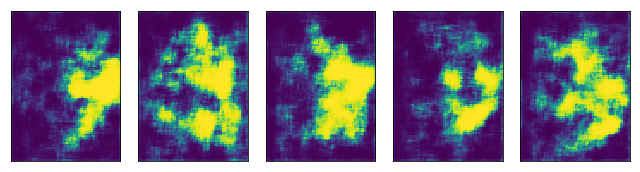


Descriminator :: loss = 0.002003834117203951, acc = 1.0
Adversarial   :: loss = 8.293262481689453, acc = 0.0625
Step 37:



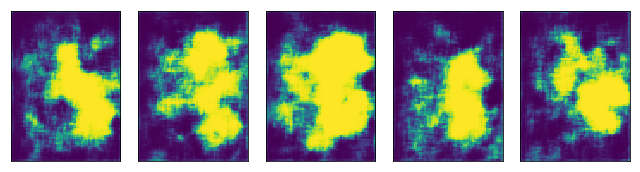


Descriminator :: loss = 0.006184219382703304, acc = 1.0
Adversarial   :: loss = 13.364294052124023, acc = 0.0
Step 38:



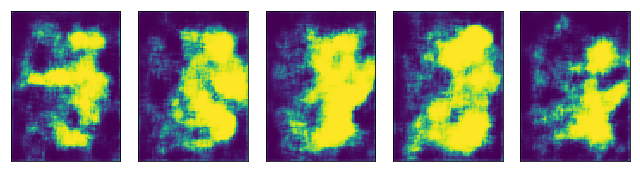


Descriminator :: loss = 0.005166335962712765, acc = 1.0
Adversarial   :: loss = 11.91444206237793, acc = 0.0
Step 39:



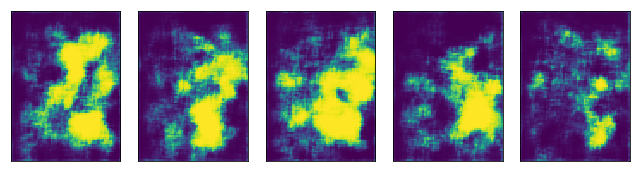


Descriminator :: loss = 0.0025415215641260147, acc = 1.0
Adversarial   :: loss = 10.52779769897461, acc = 0.03125
Step 40:



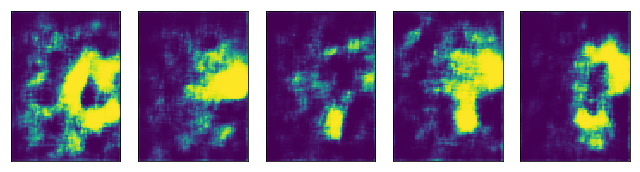


Descriminator :: loss = 0.0015952273970469832, acc = 1.0
Adversarial   :: loss = 9.920684814453125, acc = 0.09375
Step 41:



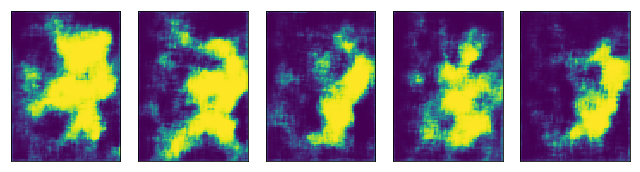


Descriminator :: loss = 0.0012875618413090706, acc = 1.0
Adversarial   :: loss = 9.290459632873535, acc = 0.09375


KeyboardInterrupt: 

In [52]:
print()
for step in range(Params.train_steps):
    X_real = X[np.random.randint(X.shape[0], size=(Params.batch_size)), :, : :]
    X_fake = network.G.predict(np.random.uniform(size=(Params.batch_size, Params.n_rand)))
    X_D = np.concatenate((X_real, X_fake))
    Y_D = np.concatenate((np.ones((X_real.shape[0], 1)), np.zeros((X_fake.shape[0], 1))))
    loss_D, acc_D = network.D.train_on_batch(X_D, Y_D)
    
    X_GD = np.random.uniform(size=(Params.batch_size, Params.n_rand))
    Y_GD = np.ones((X_GD.shape[0], 1))
    loss_GD, acc_GD = network.GD.train_on_batch(X_GD, Y_GD)
    
    if step % Params.interval == 0 and step > 0:
        print("Step {}:".format(step))
        print()
        data_utils.visualize_z(X_fake)
        print()
        print("Descriminator :: loss = {}, acc = {}".format(loss_D, acc_D))
        print("Adversarial   :: loss = {}, acc = {}".format(loss_GD, acc_GD))